# Seaborn Tutorial Runthrough

From EliteDataScience: https://elitedatascience.com/python-seaborn-tutorial

csv was modified from the original to deal with encoding issues, also note that some Seaborn methods have changed names depending on the version (the code handles this gracefully with a warning though, so things still seem to work as written in the tutorial).

### Import libraries

In [62]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the data and preview it.

In [63]:
df = pd.read_csv(r"E:\Storage\Dropbox\Dropbox\SeabornTutorial\Pokemon.csv", index_col=0)

df.head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
ID,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### Make a basic scatterplot

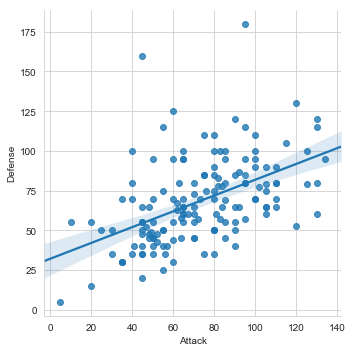

In [64]:
sns.lmplot(x="Attack",y="Defense", data=df)

### Modify the plot to remove the regression and add a hue attribute

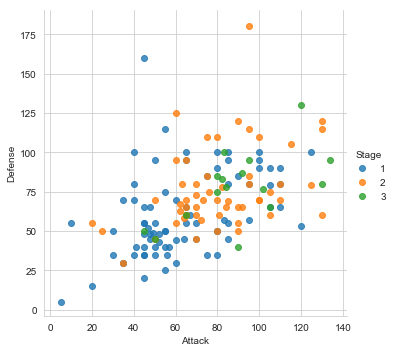

In [65]:
sns.lmplot(x="Attack",y="Defense", data=df, fit_reg=False, hue="Stage")

### Customize the plot further with matplotlib

(0, 190.43416260163693)

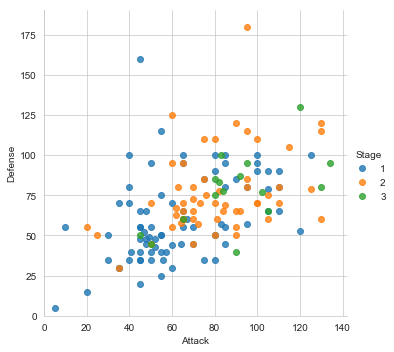

In [66]:
# Seaborn plot
sns.lmplot(x="Attack",y="Defense", data=df, fit_reg=False, hue="Stage")

# Tweak axes using matplotlib
plt.xlim(0,None)
plt.ylim(0,None)

### Boxplot

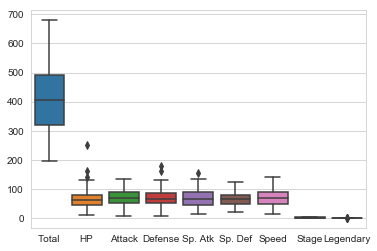

In [67]:
sns.boxplot(data=df)

Nice start, but uneeded columns are included.

### Use Pandas to preformat the dataframe

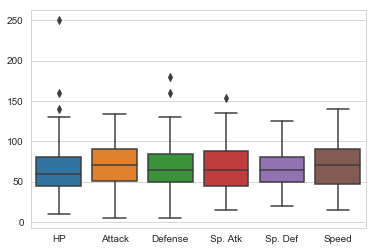

In [68]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

### Change the theme and create a violin plot

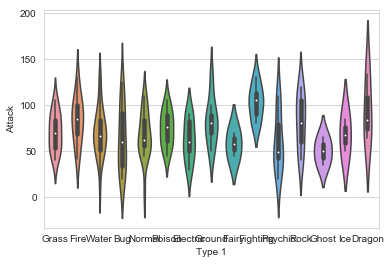

In [69]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

### Modify the colors using a palette

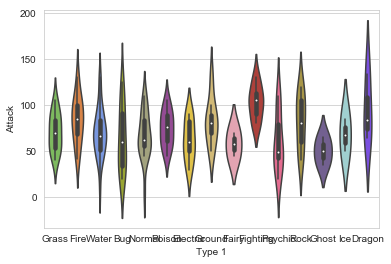

In [70]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

### Since the dataset is small, use a swarm plot instead

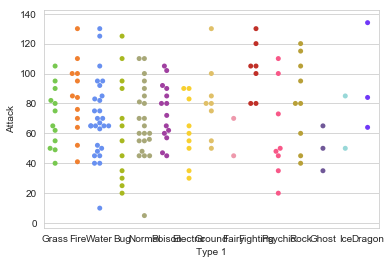

In [71]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

### Overlay both types of plots

Text(0.5, 1.0, 'Attack by Type')

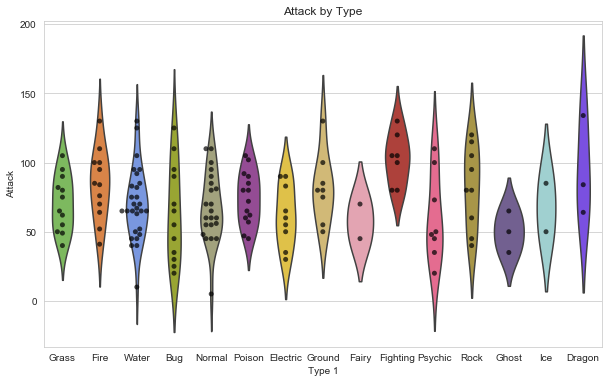

In [72]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

### Using Pandas's melt() function 

In [73]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable

# Preview output
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


### Using the melted data to create a swarm plot

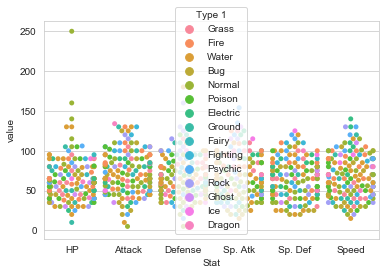

In [74]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

Not the prettiest or most helpful chart, so...

### Tweaking the chart to make it more readable

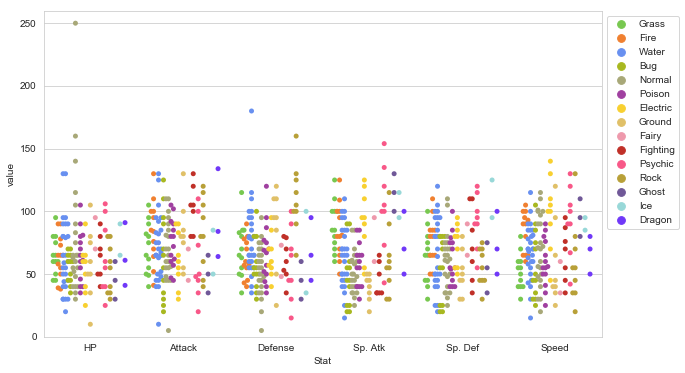

In [75]:
# Enlarge the plot
plt.figure(figsize=(10,6))

# Setup the plot data
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # Separate points by hue
              palette=pkmn_type_colors) # Use Pokemon palette
 
# Adjust the y-axis
plt.ylim(0, 260)
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

### Heatmap to visualize matrix-like data

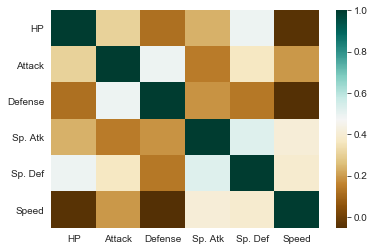

In [76]:
# Calculate correlations
corr = stats_df.corr() # note this is not the melted df
 
# Heatmap
sns.heatmap(corr, cmap="BrBG") # using Color Brewer Brown-Green color map

### Histogram aka Distribution Plot of attack stat

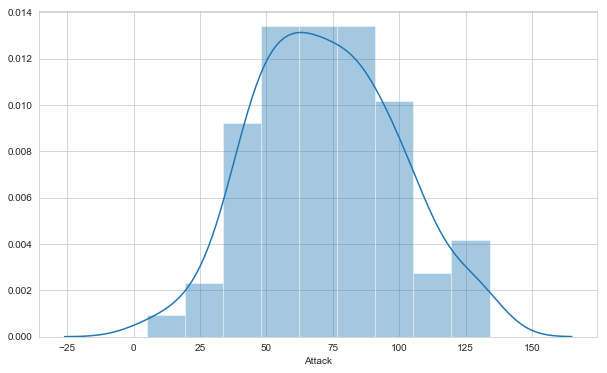

In [77]:
plt.figure(figsize=(10,6))
sns.distplot(df.Attack)

### Barchart counting by Type 1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

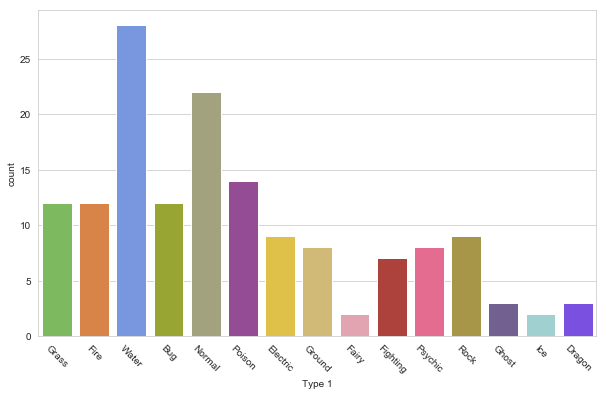

In [78]:
plt.figure(figsize=(10,6))

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Factor plot of attack for each Type 1 for each Stage

(Seems to be an issue with out of index error? Still troubleshooting where this stems from.)

IndexError: index 0 is out of bounds for axis 0 with size 0

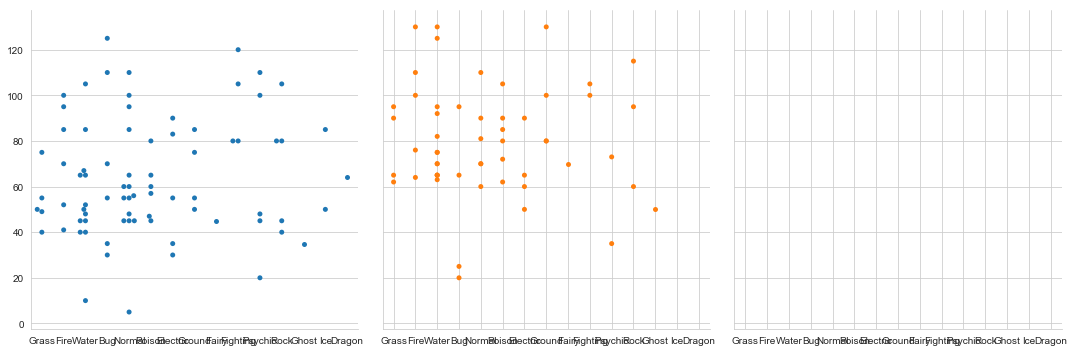

In [80]:
# Factor Plot, renamed to catplot from factorplot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
# g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

### Density Plot

In [ ]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

### Overlay Density and Scatter Plots

In [ ]:
plt.figure(figsize=(10,6))

# Density Plot
sns.kdeplot(df.Attack, df.Defense)

# Scatter Plot
sns.scatterplot(df.Attack, df.Defense)

### Joint Distribution Plot

In [ ]:
plt.figure(figsize=(10,10))

# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)